In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

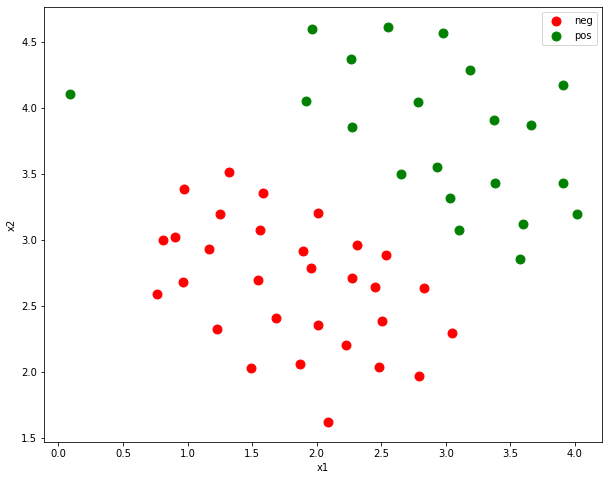

In [2]:
import utils 
from sklearn import preprocessing, metrics

############################################################################
#  Loading and Visualizing Data                                            #
#  We start the exercise by first loading and visualizing the dataset.     #
#  The following code will load the dataset into your environment and plot #
#  the data.                                                               #
############################################################################



X,y = utils.load_mat('data/ex4data1.mat')

utils.plot_twoclass_data(X,y,'x1', 'x2',['neg','pos'])
plt.show()

## Question 1 Implement SVM with sklearn

Implement SVM classifier to classify the dataset, and vary the value of C. What do you observe ?

<font color='red'>I observe that with C = 1, the training data accuracy is 0.98. With C = 2 or above, the training is 1. The line on the graph splits the pos and neg points clearly.</font>  

Accuracy on training data = 1.000


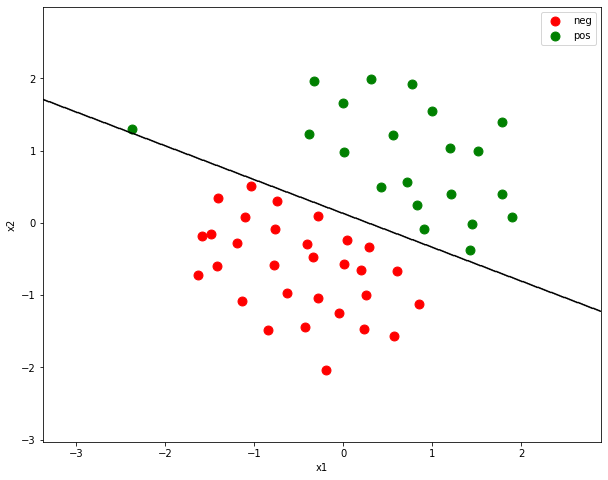

In [27]:
from sklearn.svm import LinearSVC
############################################################################
# Scale the data and set up the SVM training                               #
############################################################################

# scale the data

scaler = preprocessing.StandardScaler().fit(X)
scaleX = scaler.transform(X)

# add an intercept term and convert y values from [0,1] to [-1,1]

XX = np.array([(1,x1,x2) for (x1,x2) in scaleX])
yy = np.ones(y.shape)
yy[y == 0] = -1
yy[y == 0] = -1

############################################################################
#  Training linear SVM                                                     #
#  Train a linear SVM on the data set and the plot the learned             #
#  decision boundary                                                       #
############################################################################

############################################################################
# TODO :: You will change this line below to vary C.                       #
############################################################################
C = 5

# TODO :: define your svm classifier by using sklearn LinearSVC; expect 1 line of code
svm = LinearSVC(C = C)
# TODO :: fit on your training data; expect 1 line of code
svm.fit(XX, yy)

# TODO :: classify the training data; expect 1 line of code
y_pred = svm.predict(XX)

print("Accuracy on training data = %.3f" %metrics.accuracy_score(yy,y_pred))

# visualize the decision boundarFy

utils.plot_decision_boundary(scaleX,y,svm,'x1','x2',['neg','pos'])

## Question 2 Add PolynomialFeatures

Add polynomial features to the data and fit the LinearSVC with the new dataset.   Tune the degree of the feature interaction to make the model correctly classify all the data in training set.

In [20]:
# TODO :: expect 13 - 15 lines of code

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)

X_transformed = poly.fit_transform(XX)

svm.fit(X_transformed, yy)

y_pred = svm.predict(X_transformed)
print("Accuracy on training data = %.3f" %metrics.accuracy_score(yy,y_pred))


Accuracy on training data = 1.000
